In [1]:
import os 
os.getcwd()

'C:\\Users\\hari_'

In [4]:
os.chdir('C:\\Users\\hari_\\Documents\\Spyder_Python\\instacart')

In [32]:
#%% Instacart Market Basket Analysis 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

matplotlib.style.use('ggplot')
sns.set_style("whitegrid")



In [6]:
#%% Data wrangling 

# Data is divided into 5 separate files , we will combine them before going into EDA 

# load files 

aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')
orderproduct_prior = pd.read_csv('order_products__prior.csv')
orderproduct_train = pd.read_csv('order_products__train.csv')

In [7]:
#%% checkout data 

# Check for unique values of var ' days since prior orders': 

print(orders['days_since_prior_order'].unique())

#%% merge order_product_prior with aisle, department and order datasets to get clearer view and to understand the data better 
###information from orders, products, departments and aisles dataset, matching on product ID, aisle ID, department ID: 

df = pd.merge(orderproduct_prior, products, on ='product_id', how='left')
df = pd.merge(df, aisles, on ='aisle_id', how='left')
df = pd.merge(df, departments, on ='department_id', how='left')

df.head()

#%% Complete dataset
### Merge the data frame DF with orders dataset to obtain the most complete dataset. 

df_comp = pd.merge(df, orders, on ='order_id', how='left' )
#%% 
print(df_comp.head(25))

[nan 15. 21. 29. 28. 19. 20. 14.  0. 30. 10.  3.  8. 13. 27.  6.  9. 12.
  7. 17. 11. 22.  4.  5.  2. 23. 26. 25. 16.  1. 18. 24.]
    order_id  product_id  add_to_cart_order  reordered  \
0          2       33120                  1          1   
1          2       28985                  2          1   
2          2        9327                  3          0   
3          2       45918                  4          1   
4          2       30035                  5          0   
5          2       17794                  6          1   
6          2       40141                  7          1   
7          2        1819                  8          1   
8          2       43668                  9          0   
9          3       33754                  1          1   
10         3       24838                  2          1   
11         3       17704                  3          1   
12         3       21903                  4          1   
13         3       17668                  5          1   

# EDA questions to explore 

% =============================================================================


#### What aisle do users most frequently shop ?

#### Distribution of orders by day of the week, hour of the day, and combination of both 

#### What department gets the most sales?

#### Distribution of days since prior order ?

#### Which department has the highest re-order ratio?

% =============================================================================


C:\Users\hari_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test, Prior Data Breakdown')

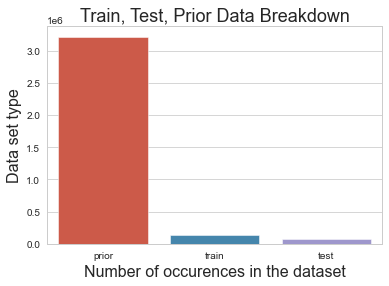

In [17]:
count= orders['eval_set'].value_counts()

# Test,train, prior order data split 
#%%
sns.barplot(count.index,count.values)
plt.xlabel('Number of occurences in the dataset', fontsize = 16)
plt.ylabel('Data set type', fontsize = 16)
plt.title('Train, Test, Prior Data Breakdown', fontsize = 18)

Text(0.5, 1.0, 'Order count distribution across Hour of the day')

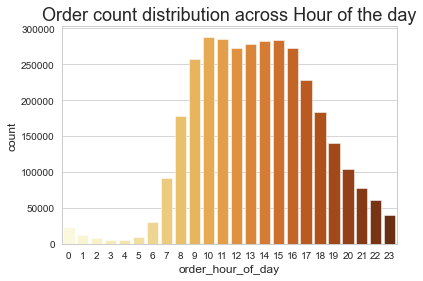

In [18]:
# Hour of the day when most orders are placed 

orders_tod_count = orders['order_hour_of_day'].value_counts()

ax = sns.countplot(x="order_hour_of_day", data=orders,palette="YlOrBr")
plt.title('Order count distribution across Hour of the day', fontsize = 18)


From the distribution we can identify peak hours are between 9 am - 4pm , especially 9 - 10am and 2 - 3 pm 

Text(0.5, 1.0, 'Order count split for Day of the week')

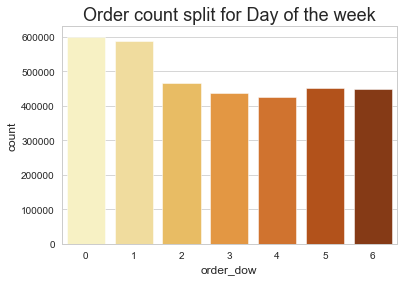

In [19]:
# next step is to visualize how order count varies based on day of the week 

orders_dow_count=orders['order_dow'].value_counts()
ax = sns.countplot(x="order_dow", data=orders,palette="YlOrBr")
plt.title('Order count split for Day of the week', fontsize = 18)

Highest number of orders are placed on Sunday and Monday, on other days it is almost in same level

Text(0.5, 1.0, 'Frequency of Day of week Vs Hour of day')

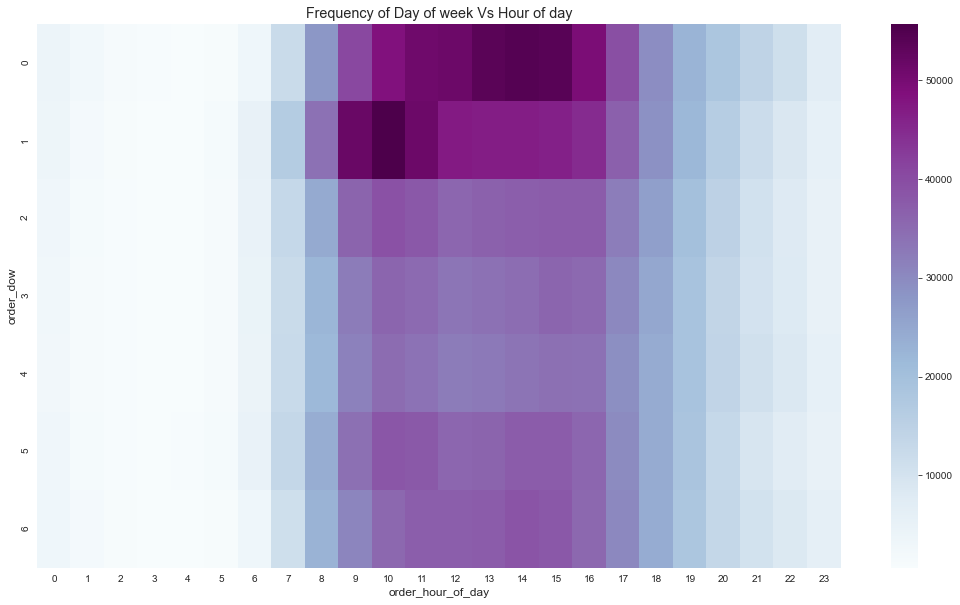

In [20]:
# next we will visulaize how the count of orders placed differ on Hour od the day scale with change in day of week 

order_countsplit = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
order_countsplit  = order_countsplit .pivot('order_dow', 'order_hour_of_day', 'order_number')


plt.figure(figsize=(18,10))
sns.heatmap(order_countsplit,cmap="BuPu")
plt.title("Frequency of Day of week Vs Hour of day")


Sunday peak hours are different from rest of the week, Sunday afternoon and Monday mornings are busier, rest of the week has same pattern

Text(0.5, 1.0, 'Frequency distribution by days since prior order')

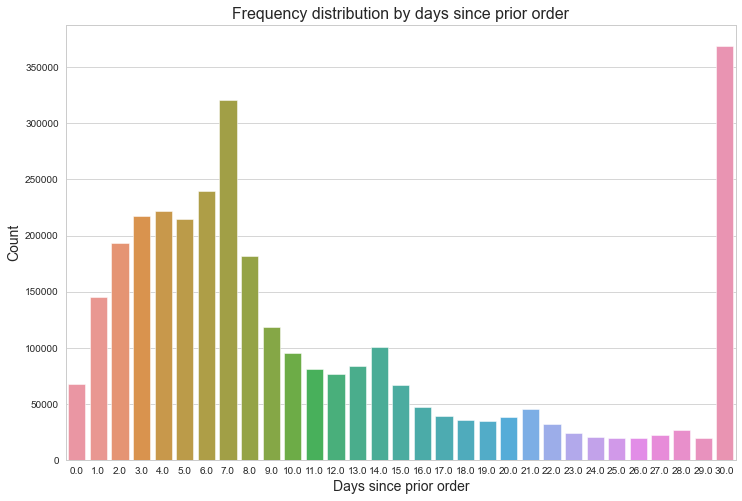

In [21]:
# next we will visualize distribution of days since prior order 

plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Days since prior order', fontsize=14)
plt.title("Frequency distribution by days since prior order", fontsize=16)

there are relative spikes for 7 day cycle =, and there is a huge spike at end of the month 


In [24]:
#%% Most ordered products 

product_count = df_comp['product_name'].value_counts().reset_index().head(20)
product_count.columns=['Product_name','Frequency']
product_count.head()

,Product_name,Frequency
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584


In [25]:
#%% check for department that is frequently visited 

count_department = df_comp['department'].value_counts()
count_department.head()

produce       9479291
dairy eggs    5414016
snacks        2887550
beverages     2690129
frozen        2236432
Name: department, dtype: int64

C:\Users\hari_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


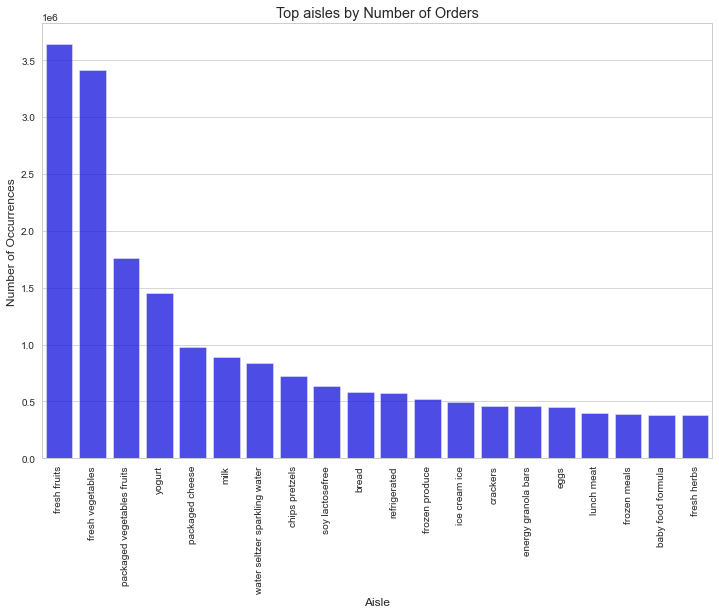

In [26]:
#%% Top aisles in which customers placed orders 


cnt_srs = df_comp['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color = 'blue')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.title("Top aisles by Number of Orders")
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


C:\Users\hari_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


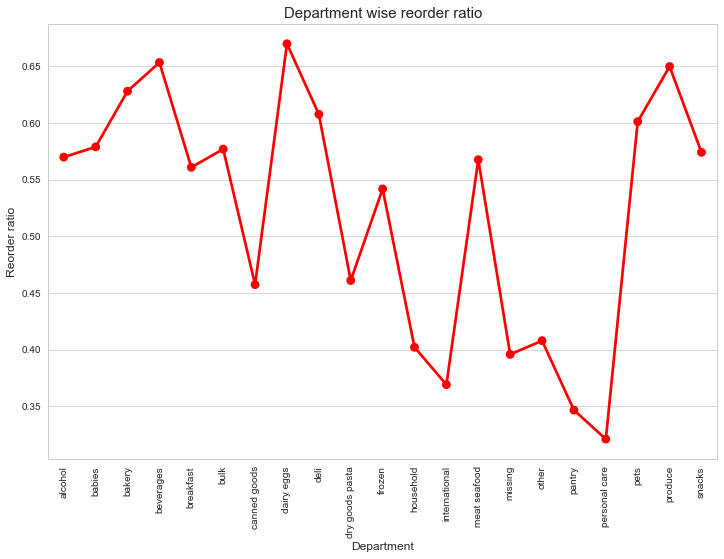

In [27]:
#%% Reorder percentage by department 

reorder_df = df_comp.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(reorder_df['department'].values, reorder_df['reordered'].values, alpha=0.8, color="red")
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


# PCA in conjunction with k-means is a powerful method for visualizing high dimensional data

In [28]:
#%% PCA and K-means clustering 
# step 1- Dimensionality reduction 
cust_prod = pd.crosstab(df_comp['user_id'], df_comp['aisle'])
print(cust_prod.head(10))
#%% PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(cust_prod)
pca_samples = pca.transform(cust_prod)
ps = pd.DataFrame(pca_samples)

aisle    air fresheners candles  asian foods  baby accessories  \
user_id                                                          
1                             0            0                 0   
2                             0            3                 0   
3                             0            0                 0   
4                             0            0                 0   
5                             0            2                 0   
6                             0            0                 0   
7                             0            0                 0   
8                             0            1                 0   
9                             0            0                 0   
10                            0            1                 0   

aisle    baby bath body care  baby food formula  bakery desserts  \
user_id                                                            
1                          0                  0                0   
2  

(206209, 2)
          4          1
0  0.269142   2.429427
1 -6.920987  36.751116
2 -0.442307   2.404383
3 -0.288236  -0.755823
4  0.612838  -2.637225


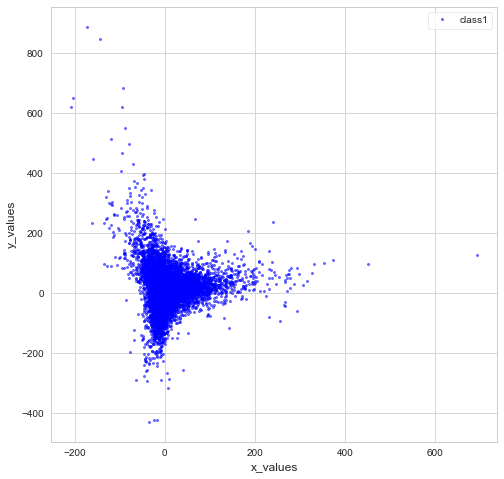

In [29]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
tocluster = pd.DataFrame(ps[[4,1]])
print (tocluster.shape)
print (tocluster.head())

fig = plt.figure(figsize=(8,8))
plt.plot(tocluster[4], tocluster[1], 'o', markersize=2, color='blue', alpha=0.5, label='class1')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()


In [30]:
# Finding Clusters 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

clusterer = KMeans(n_clusters=4,random_state=42).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)
print(centers)

[[ -0.11732606   0.11145433]
 [ 76.89149946  26.26877432]
 [ -4.69254794 -40.45077073]
 [-11.29464995  65.36233488]]


['orange', 'green', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange', 'orange']


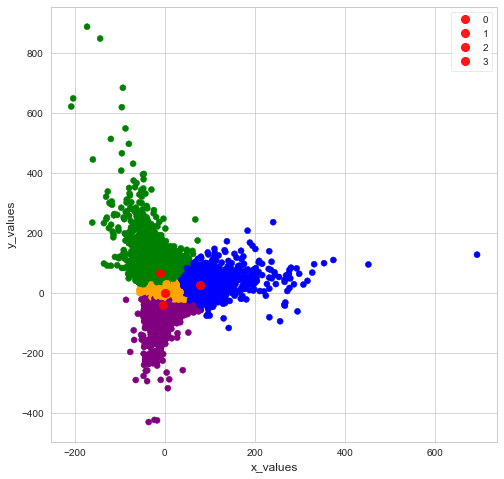

In [31]:
import matplotlib
fig = plt.figure(figsize=(8,8))
colors = ['orange','blue','purple','green']
colored = [colors[k] for k in c_preds]
print (colored[0:10])
plt.scatter(tocluster[4],tocluster[1],  color = colored)
for ci,c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8, color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.show()